---
## 기본적인 pytorch
---

In [17]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [26]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using Pytorch version :', torch.__version__, 'Device :', DEVICE)

Using Pytorch version : 1.12.1 Device : cpu


In [14]:
BATCH_SIZE = 32
Epochs = 10

In [15]:
train_dataset = datasets.MNIST(root = '../dataset/MNIST', train = True, download =  True, transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = '../dataset/MNIST', train = False, download = True, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = BATCH_SIZE, shuffle = False)

In [12]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'y_train:', y_train.type())
    print('X_train:', y_train.size(), 'y_train:', y_train.type())

X_train: torch.Size([32, 1, 28, 28]) y_train: torch.LongTensor
X_train: torch.Size([32]) y_train: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) y_train: torch.LongTensor
X_train: torch.Size([32]) y_train: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) y_train: torch.LongTensor
X_train: torch.Size([32]) y_train: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) y_train: torch.LongTensor
X_train: torch.Size([32]) y_train: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) y_train: torch.LongTensor
X_train: torch.Size([32]) y_train: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) y_train: torch.LongTensor
X_train: torch.Size([32]) y_train: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) y_train: torch.LongTensor
X_train: torch.Size([32]) y_train: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) y_train: torch.LongTensor
X_train: torch.Size([32]) y_train: torch.LongTensor
X_train: torch.Size([32, 1, 28, 28]) y_train: torch.LongTensor
X_train: torch.Si

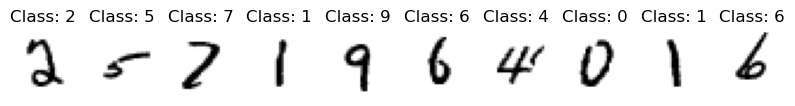

In [19]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = 'gray_r')
    plt.title('Class: '+str(y_train[i].item()))

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512) 
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x
           

In [27]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.4)
criterion = nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [32]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        lable = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, lable)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train_Epoch:{}  [{}/{} ({:.0f})%]\tTrain loss: {:.06}'.format(Epoch, batch_idx * len(image), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))        

In [30]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy      

In [33]:
for Epoch in range(1, Epochs + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n[Epoch: {}], \tTest Loss: {:4f}, \tTest Accuracy: {:.2} % \n'.format(Epoch, test_loss, test_accuracy))

Train_Epoch:1  [0/60000 (0)%]	Train loss: 0.0330921
Train_Epoch:1  [6400/60000 (11)%]	Train loss: 0.0401705
Train_Epoch:1  [12800/60000 (21)%]	Train loss: 0.0280965
Train_Epoch:1  [19200/60000 (32)%]	Train loss: 0.0730168
Train_Epoch:1  [25600/60000 (43)%]	Train loss: 0.171898
Train_Epoch:1  [32000/60000 (53)%]	Train loss: 0.0264865
Train_Epoch:1  [38400/60000 (64)%]	Train loss: 0.101354
Train_Epoch:1  [44800/60000 (75)%]	Train loss: 0.0298996
Train_Epoch:1  [51200/60000 (85)%]	Train loss: 0.01538
Train_Epoch:1  [57600/60000 (96)%]	Train loss: 0.0739216

[Epoch: 1], 	Test Loss: 0.002584, 	Test Accuracy: 9.7e+01 % 

Train_Epoch:2  [0/60000 (0)%]	Train loss: 0.0231412
Train_Epoch:2  [6400/60000 (11)%]	Train loss: 0.0267226
Train_Epoch:2  [12800/60000 (21)%]	Train loss: 0.0246492
Train_Epoch:2  [19200/60000 (32)%]	Train loss: 0.0402079
Train_Epoch:2  [25600/60000 (43)%]	Train loss: 0.0166544
Train_Epoch:2  [32000/60000 (53)%]	Train loss: 0.0243098
Train_Epoch:2  [38400/60000 (64)%]	Train 

KeyboardInterrupt: 

---
## pytorch dropout의 적용
---

In [37]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512) 
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, training= self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = F.relu(x)
        x = F.dropout(x, training= self.training, p = self.dropout_prob)        
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [38]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.4)
criterion = nn.CrossEntropyLoss()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [40]:
for Epoch in range(1, Epochs + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print('\n[Epoch: {}], \tTest Loss: {:4f}, \tTest Accuracy: {:.2f} % \n'.format(Epoch, test_loss, test_accuracy))

Train_Epoch:1  [0/60000 (0)%]	Train loss: 0.442425
Train_Epoch:1  [6400/60000 (11)%]	Train loss: 0.463427
Train_Epoch:1  [12800/60000 (21)%]	Train loss: 0.520763
Train_Epoch:1  [19200/60000 (32)%]	Train loss: 0.253093
Train_Epoch:1  [25600/60000 (43)%]	Train loss: 0.423158
Train_Epoch:1  [32000/60000 (53)%]	Train loss: 0.452293
Train_Epoch:1  [38400/60000 (64)%]	Train loss: 0.153431
Train_Epoch:1  [44800/60000 (75)%]	Train loss: 0.648733
Train_Epoch:1  [51200/60000 (85)%]	Train loss: 0.299105
Train_Epoch:1  [57600/60000 (96)%]	Train loss: 0.197483

[Epoch: 1], 	Test Loss: 0.007749, 	Test Accuracy: 92.77 % 

Train_Epoch:2  [0/60000 (0)%]	Train loss: 0.207436
Train_Epoch:2  [6400/60000 (11)%]	Train loss: 0.443497
Train_Epoch:2  [12800/60000 (21)%]	Train loss: 0.244113
Train_Epoch:2  [19200/60000 (32)%]	Train loss: 0.327969
Train_Epoch:2  [25600/60000 (43)%]	Train loss: 0.0784175
Train_Epoch:2  [32000/60000 (53)%]	Train loss: 0.108976
Train_Epoch:2  [38400/60000 (64)%]	Train loss: 0.22855

---
# Fashion Mnist
---

##### (1) 모듈로딩

In [60]:
#모듈 import 
import numpy as np
import matplotlib.pyplot as plt 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

##### (2) 설계 장비 확인

In [61]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('사용 중인 Pytorch 버전', torch.__version__, 'Device type ', DEVICE)

사용 중인 Pytorch 버전 1.12.1 Device type  cpu


##### (3) 배치사이즈와 Epochs

In [62]:
BATCH_SIZE = 32 #학습 데이터를 묶어 학습함.
EPOCHS = 10 #mini batch 1개 단위로 모델의 가중값을 업데이트(즉, 10번 반복하여 학습)

##### (4) 데이터 로드

In [63]:
train_dataset = datasets.FashionMNIST(root = '../dataset/FashionMNIST', train = True, download= True, transform = transforms.ToTensor())
# 학습데이터 다운로드 및 tensor의 형태로 전환
test_dataset = datasets.FashionMNIST(root = '../dataset/FashionMNIST', train = False, download= True, transform = transforms.ToTensor())
# 테스트 데이터 다운로드
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = BATCH_SIZE, shuffle = False)

##### (5)데이터 확인

In [64]:
for (x_train, y_train) in train_loader:
    print('X_train:', x_train.size(), 'type: ', x_train.type())
    print('y_train:', y_train.size(), 'type: ', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type:  torch.FloatTensor
y_train: torch.Size([32]) type:  torch.LongTensor


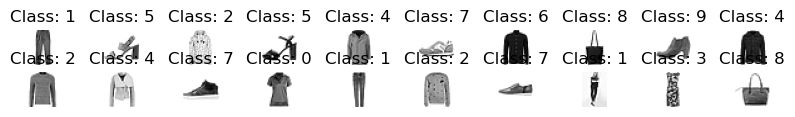

In [65]:
pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.axis('off')
    plt.imshow(x_train[i, :, :, :].numpy().reshape(28,28), cmap = 'gray_r')
    plt.title('Class: '+ str(y_train[i].item()))

##### (6) 모델 작성

In [66]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 32),
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [67]:
model = AE().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MSELoss() #input 이미지와 output이미지 간의 mse를 비교하기 위해 MSE사용 
print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


In [68]:
def train(model, train_loader, optimizer, log_interval):
    model.train()#모델 학습상태 지정
    for batch_idx, (image, _) in enumerate(train_loader):
        image = image.view(-1, 28 * 28).to(DEVICE)
        target = image.view(-1, 28 * 28).to(DEVICE)
        optimizer.zero_grad()
        encoded, decoded = model(image)
        loss = criterion(decoded, target)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}'.format(Epoch, batch_idx * len(image), len(train_loader.dataset), 100. * batch_idx / len(train_loader), loss.item()))

In [69]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    real_image = []
    gen_image = []
    with torch.no_grad():
        for image, _ in test_loader:
            image = image.view(-1, 28 * 28).to(DEVICE)
            target = image.view(-1, 28 * 28).to(DEVICE)
            encoded, decoded = model(image)

            test_loss += criterion(decoded, image).item()
            real_image.append(image.to(DEVICE))
            gen_image.append(decoded.to(DEVICE))
    test_loss /= len(test_loader.dataset) 
    return test_loss, real_image, gen_image        

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 0.215345
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 0.025848
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 0.021687
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 0.020487
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 0.016575
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 0.017185
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 0.017864
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 0.019099
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 0.016596
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 0.014213

[EPOCH: 1], 	 Test loss: 0.0005


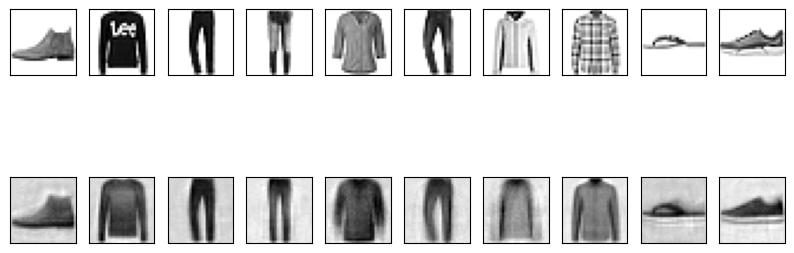

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 0.016925
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 0.016534
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 0.014665
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 0.011694
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 0.015654
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 0.013656
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 0.011829
Train Epoch: 2 [44800/60000 (75%)]	Train Loss: 0.013643
Train Epoch: 2 [51200/60000 (85%)]	Train Loss: 0.011566
Train Epoch: 2 [57600/60000 (96%)]	Train Loss: 0.011612

[EPOCH: 2], 	 Test loss: 0.0004


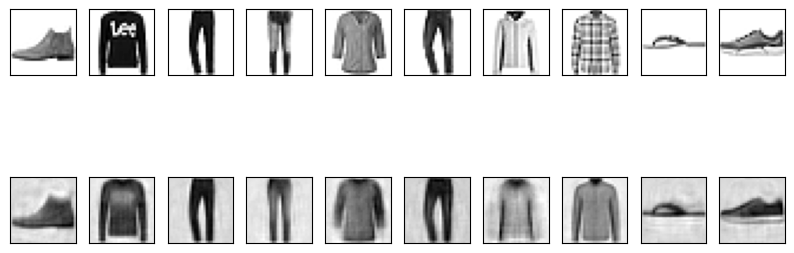

Train Epoch: 3 [0/60000 (0%)]	Train Loss: 0.013171
Train Epoch: 3 [6400/60000 (11%)]	Train Loss: 0.014886
Train Epoch: 3 [12800/60000 (21%)]	Train Loss: 0.010722
Train Epoch: 3 [19200/60000 (32%)]	Train Loss: 0.010118
Train Epoch: 3 [25600/60000 (43%)]	Train Loss: 0.014632
Train Epoch: 3 [32000/60000 (53%)]	Train Loss: 0.012349
Train Epoch: 3 [38400/60000 (64%)]	Train Loss: 0.013838
Train Epoch: 3 [44800/60000 (75%)]	Train Loss: 0.015129
Train Epoch: 3 [51200/60000 (85%)]	Train Loss: 0.010265
Train Epoch: 3 [57600/60000 (96%)]	Train Loss: 0.010395

[EPOCH: 3], 	 Test loss: 0.0004


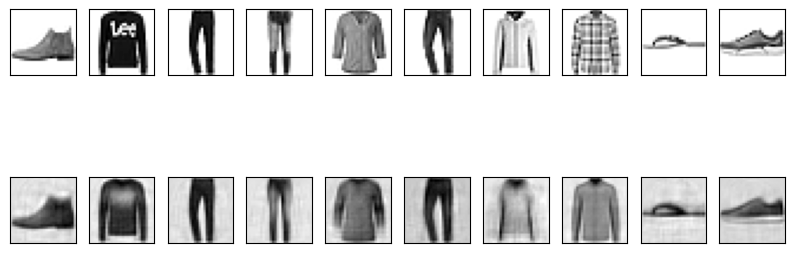

Train Epoch: 4 [0/60000 (0%)]	Train Loss: 0.011332
Train Epoch: 4 [6400/60000 (11%)]	Train Loss: 0.010340
Train Epoch: 4 [12800/60000 (21%)]	Train Loss: 0.010161
Train Epoch: 4 [19200/60000 (32%)]	Train Loss: 0.011275
Train Epoch: 4 [25600/60000 (43%)]	Train Loss: 0.013153
Train Epoch: 4 [32000/60000 (53%)]	Train Loss: 0.012886
Train Epoch: 4 [38400/60000 (64%)]	Train Loss: 0.009139
Train Epoch: 4 [44800/60000 (75%)]	Train Loss: 0.014579
Train Epoch: 4 [51200/60000 (85%)]	Train Loss: 0.013635
Train Epoch: 4 [57600/60000 (96%)]	Train Loss: 0.011470

[EPOCH: 4], 	 Test loss: 0.0004


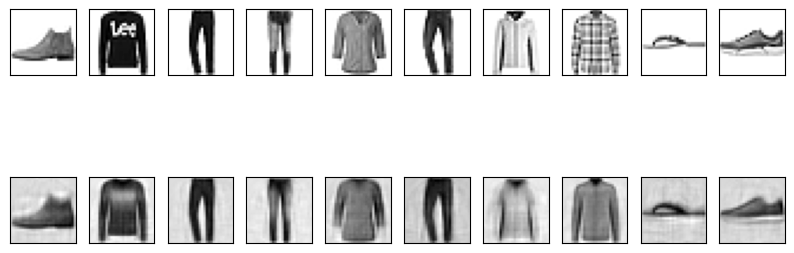

Train Epoch: 5 [0/60000 (0%)]	Train Loss: 0.012937
Train Epoch: 5 [6400/60000 (11%)]	Train Loss: 0.010313
Train Epoch: 5 [12800/60000 (21%)]	Train Loss: 0.010883
Train Epoch: 5 [19200/60000 (32%)]	Train Loss: 0.009947
Train Epoch: 5 [25600/60000 (43%)]	Train Loss: 0.011759
Train Epoch: 5 [32000/60000 (53%)]	Train Loss: 0.011878
Train Epoch: 5 [38400/60000 (64%)]	Train Loss: 0.010880
Train Epoch: 5 [44800/60000 (75%)]	Train Loss: 0.009910
Train Epoch: 5 [51200/60000 (85%)]	Train Loss: 0.009483
Train Epoch: 5 [57600/60000 (96%)]	Train Loss: 0.011665

[EPOCH: 5], 	 Test loss: 0.0003


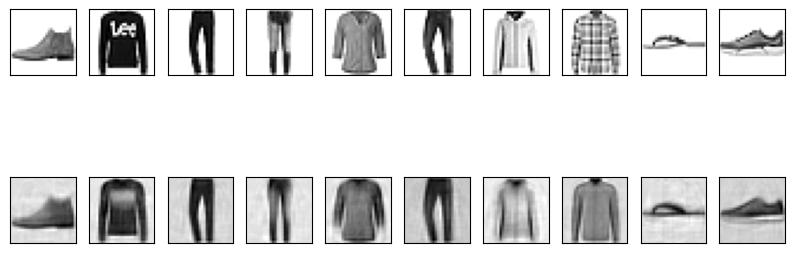

Train Epoch: 6 [0/60000 (0%)]	Train Loss: 0.010525
Train Epoch: 6 [6400/60000 (11%)]	Train Loss: 0.010382
Train Epoch: 6 [12800/60000 (21%)]	Train Loss: 0.011802
Train Epoch: 6 [19200/60000 (32%)]	Train Loss: 0.008108
Train Epoch: 6 [25600/60000 (43%)]	Train Loss: 0.010818
Train Epoch: 6 [32000/60000 (53%)]	Train Loss: 0.011568
Train Epoch: 6 [38400/60000 (64%)]	Train Loss: 0.010337
Train Epoch: 6 [44800/60000 (75%)]	Train Loss: 0.010078
Train Epoch: 6 [51200/60000 (85%)]	Train Loss: 0.011436
Train Epoch: 6 [57600/60000 (96%)]	Train Loss: 0.009850

[EPOCH: 6], 	 Test loss: 0.0003


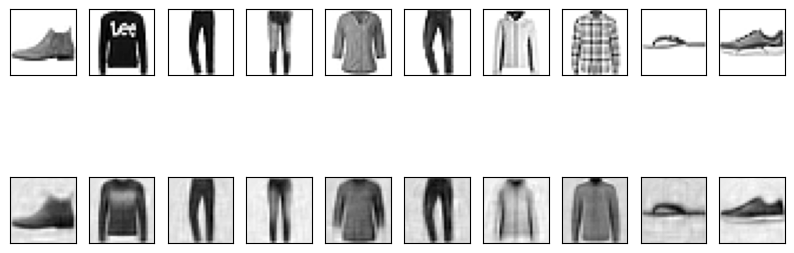

Train Epoch: 7 [0/60000 (0%)]	Train Loss: 0.008695
Train Epoch: 7 [6400/60000 (11%)]	Train Loss: 0.010288
Train Epoch: 7 [12800/60000 (21%)]	Train Loss: 0.008511
Train Epoch: 7 [19200/60000 (32%)]	Train Loss: 0.010078
Train Epoch: 7 [25600/60000 (43%)]	Train Loss: 0.009001
Train Epoch: 7 [32000/60000 (53%)]	Train Loss: 0.010746
Train Epoch: 7 [38400/60000 (64%)]	Train Loss: 0.009249
Train Epoch: 7 [44800/60000 (75%)]	Train Loss: 0.009153
Train Epoch: 7 [51200/60000 (85%)]	Train Loss: 0.014384
Train Epoch: 7 [57600/60000 (96%)]	Train Loss: 0.012528

[EPOCH: 7], 	 Test loss: 0.0003


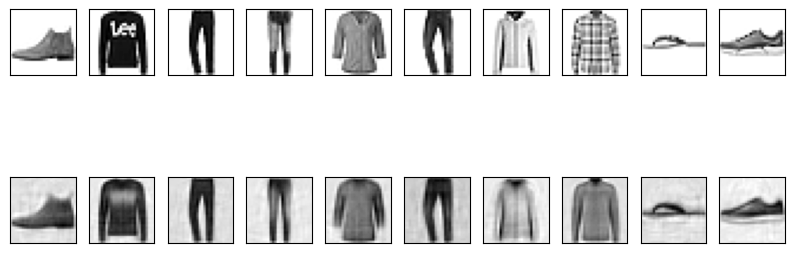

Train Epoch: 8 [0/60000 (0%)]	Train Loss: 0.008946
Train Epoch: 8 [6400/60000 (11%)]	Train Loss: 0.009047
Train Epoch: 8 [12800/60000 (21%)]	Train Loss: 0.010607
Train Epoch: 8 [19200/60000 (32%)]	Train Loss: 0.009443
Train Epoch: 8 [25600/60000 (43%)]	Train Loss: 0.007705
Train Epoch: 8 [32000/60000 (53%)]	Train Loss: 0.009786
Train Epoch: 8 [38400/60000 (64%)]	Train Loss: 0.011787
Train Epoch: 8 [44800/60000 (75%)]	Train Loss: 0.009929
Train Epoch: 8 [51200/60000 (85%)]	Train Loss: 0.010840
Train Epoch: 8 [57600/60000 (96%)]	Train Loss: 0.010907

[EPOCH: 8], 	 Test loss: 0.0003


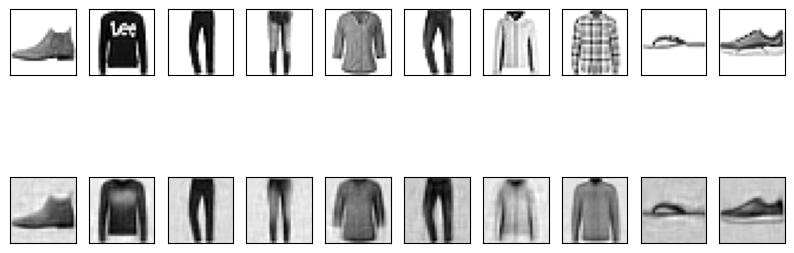

Train Epoch: 9 [0/60000 (0%)]	Train Loss: 0.012301
Train Epoch: 9 [6400/60000 (11%)]	Train Loss: 0.012556
Train Epoch: 9 [12800/60000 (21%)]	Train Loss: 0.011524
Train Epoch: 9 [19200/60000 (32%)]	Train Loss: 0.011181
Train Epoch: 9 [25600/60000 (43%)]	Train Loss: 0.010975
Train Epoch: 9 [32000/60000 (53%)]	Train Loss: 0.009908
Train Epoch: 9 [38400/60000 (64%)]	Train Loss: 0.011750
Train Epoch: 9 [44800/60000 (75%)]	Train Loss: 0.008440
Train Epoch: 9 [51200/60000 (85%)]	Train Loss: 0.009214
Train Epoch: 9 [57600/60000 (96%)]	Train Loss: 0.008472

[EPOCH: 9], 	 Test loss: 0.0003


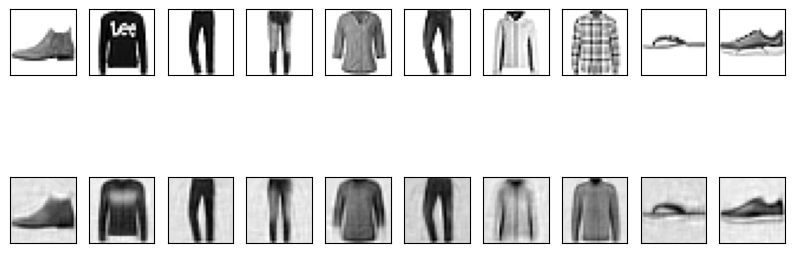

In [70]:
for Epoch in range(1, EPOCHS):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, real_image, gen_image = evaluate(model, test_loader)
    print('\n[EPOCH: {}], \t Test loss: {:.4f}'.format(Epoch, test_loss))
    f, a = plt.subplots(2, 10, figsize = (10, 4))
    for i in range(10):
        img = np.reshape(real_image[0][i], (28,28))
        a[0][i].imshow(img, cmap = 'gray_r')
        a[0][i].set_xticks(())
        a[0][i].set_yticks(())
    for i in range(10):
        img = np.reshape(gen_image[0][i], (28,28))
        a[1][i].imshow(img, cmap = 'gray_r')
        a[1][i].set_xticks(())
        a[1][i].set_yticks(())
    plt.show()